# original git repo : https://github.com/DeepTrial/Retina-VesselNet

---------------resulting image of the prediction !---------------


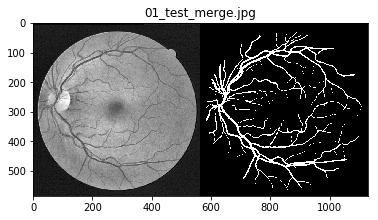

In [1]:
import matplotlib.pyplot as plt
import os
%matplotlib inline 
print("---------------resulting image of the prediction !---------------")
result_path='./experiments/VesselNet/test/result/'
result_imgs=os.listdir(result_path)
#print(result_imgs)

#fig = plt.figure()
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
#fig.add_subplot(1, i, 1)
im=plt.imread(result_path+result_imgs[0])
plt.imshow(im)
plt.title(result_imgs[0])
plt.show()



# it took too long to compute per image so i skip demo this 


In [ ]:
%run main_test.py

Using TensorFlow backend.


[INFO] Reading Configs...
[INFO] Predicting...
[Info] Analyze filename... 01_test
new full images shape: 
(1, 586, 566, 1)
9405/9405 [==============================] - ETA: 1:18:2 - ETA: 54:48  - ETA: 47:0 - ETA: 42:4 - ETA: 40:1 - ETA: 38:4 - ETA: 39:4 - ETA: 40:1 - ETA: 40:0 - ETA: 39:2 - ETA: 38:4 - ETA: 38:0 - ETA: 37:3 - ETA: 37:1 - ETA: 37:0 - ETA: 36:5 - ETA: 36:2 - ETA: 36:0 - ETA: 35:4 - ETA: 35:4 - ETA: 35:2 - ETA: 35:1 - ETA: 34:5 - ETA: 34:3 - ETA: 34:2 - ETA: 34:0 - ETA: 33:5 - ETA: 33:3 - ETA: 33:2 - ETA: 33:2 - ETA: 33:2 - ETA: 33:1 - ETA: 33:0 - ETA: 32:5 - ETA: 32:4 - ETA: 32:3 - ETA: 32:2 - ETA: 32:1 - ETA: 32:0 - ETA: 31:5 - ETA: 31:3 - ETA: 31:2 - ETA: 31:1 - ETA: 31:0 - ETA: 30:5 - ETA: 30:4 - ETA: 30:3 - ETA: 30:2 - ETA: 30:2 - ETA: 30:1 - ETA: 30:0 - ETA: 29:5 - ETA: 29:4 - ETA: 29:3 - ETA: 29:2 - ETA: 29:1 - ETA: 29:1 - ETA: 29:0 - ETA: 28:5 - ETA: 28:4 - ETA: 28:3 - ETA: 28:3 - ETA: 28:2 - ETA: 28:1 - ETA: 28:0 - ETA: 27:5 - ETA: 27:4 - ETA: 27:4 - ETA: 27:3 - 

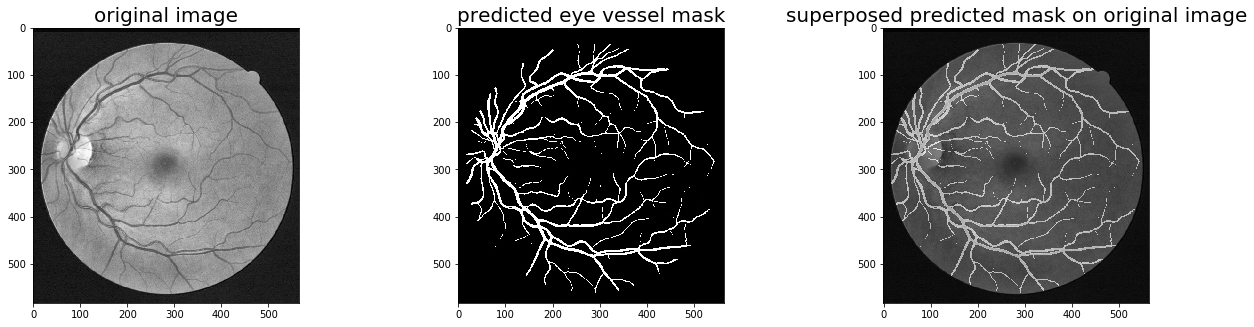

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,60)
%matplotlib inline
img1 = im[:,:565,:]
img2 = im[:,565:,:] # this one has transparency

#result = np.zeros((h, w, 3), np.uint8)
alpha=0.5
beta=0.5
gamma=0
result=cv2.addWeighted(img1, alpha, img2, beta, gamma)
#setting alpha=1, beta=1, gamma=0 gives direct overlay of two images
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.6)
fig.add_subplot(1, 3, 1)
fig.set_size_inches(20,20)
plt.imshow(img1)
plt.title("original image",fontsize=20)

fig.add_subplot(1, 3, 2 )
fig.set_size_inches(20,20)
plt.imshow(img2)
plt.title("predicted eye vessel mask",fontsize=20)

fig.add_subplot(1, 3, 3)
fig.set_size_inches(20,20)
plt.imshow(result[:,:,[2,1,0]])
plt.title("superposed predicted mask on original image",fontsize=20)
plt.show()


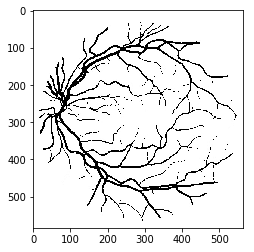

In [17]:


hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

# define range of white color in HSV
# change it according to your need !
lower_white = np.array([0,0,0], dtype=np.uint8)
upper_white = np.array([0,0,255], dtype=np.uint8)

# Threshold the HSV image to get only white colors
mask = cv2.inRange(hsv, lower_white, upper_white)
# Bitwise-AND mask and original image
res = cv2.bitwise_not(img2,img2, mask= mask)

plt.imshow(res[:,:,[2,1,0]])
plt.show()

---------------resulting image of the prediction !---------------


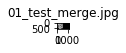

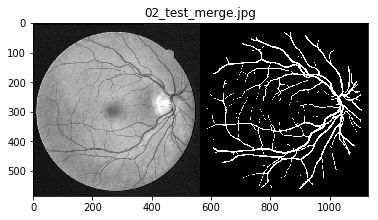

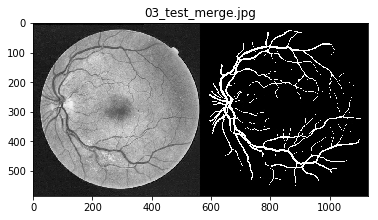

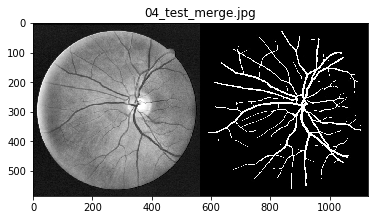

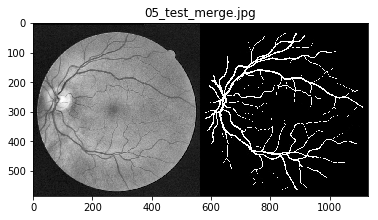

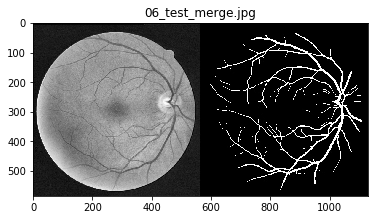

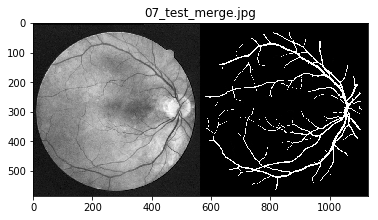

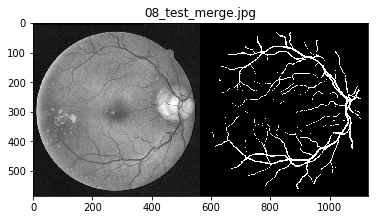

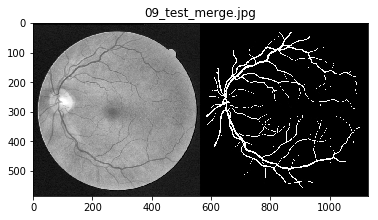

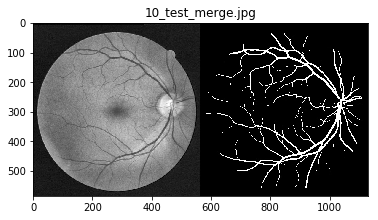

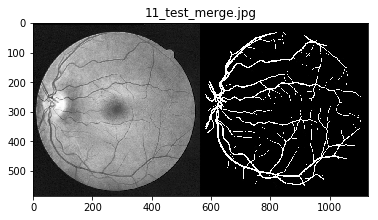

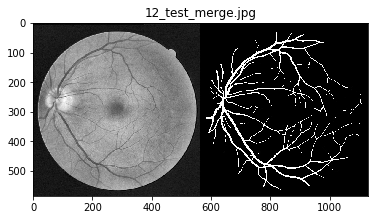

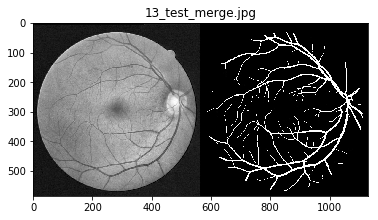

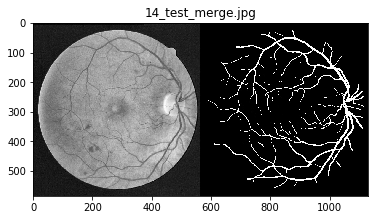

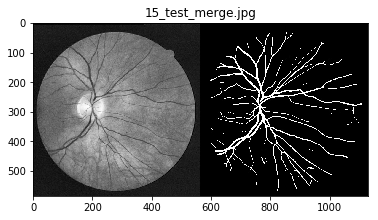

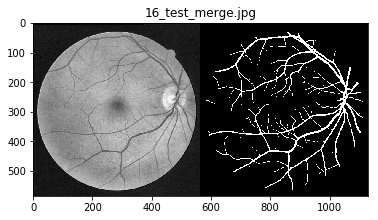

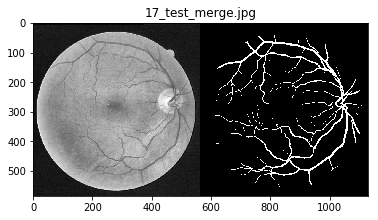

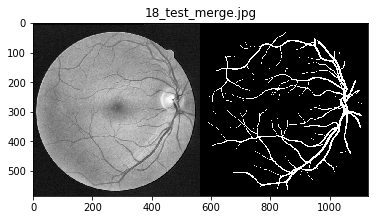

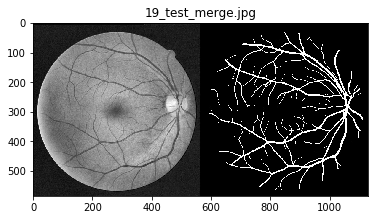

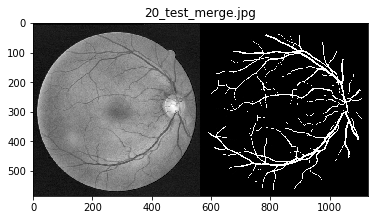

In [13]:
import matplotlib.pyplot as plt
import os
%matplotlib inline
print("---------------resulting image of the prediction !---------------")
result_path='./experiments/VesselNet/test/result/'
result_imgs=os.listdir(result_path)
result_imgs=[f for f in result_imgs if f.endswith('.jpg')]

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
l=len(result_imgs)
for i in range(l):
    f=result_imgs[i]
    fig.add_subplot(1, l, i+1)
    im=plt.imread(result_path+result_imgs[i])
    plt.imshow(im)
    plt.title(result_imgs[i])
    plt.show()